In [421]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [422]:
dating_clean = pd.read_csv('/home/amybirdee/hobby_projects/dating_site/dating_clean.csv', delimiter = ',')

In [423]:
dating_clean.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75,-1,transportation,...,"south san francisco, california","doesn't have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,white,70,80000,hospitality / travel,...,"oakland, california","doesn't have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,no response given,graduated from masters program,no response given,68,-1,no response given,...,"san francisco, california",no response given,straight,has cats,no response given,m,pisces but it doesn't matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,no response given,working on college/university,white,71,20000,student,...,"berkeley, california",doesn't want kids,straight,likes cats,no response given,m,pisces,no,"english, german (poorly)",single
4,29,athletic,no response given,socially,never,graduated from college/university,"asian, black, other",66,-1,artistic / musical / writer,...,"san francisco, california",no response given,straight,likes dogs and likes cats,no response given,m,aquarius,no,english,single


In [424]:
#viewing column names
dating_clean.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity',
       'height', 'income', 'job', 'last_online', 'location', 'offspring',
       'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes', 'speaks',
       'status'],
      dtype='object')

In [425]:
#grouping by body type - majority are average body type
body = dating_clean.groupby('body_type').size().sort_values(ascending = False).to_frame().reset_index().rename(columns = \
                                                                                                    {0: 'body_type_count'})
body

,body_type,body_type_count
0,average,19947
1,fit,12711
2,athletic,11818
3,thin,4711
4,curvy,3924
5,a little extra,2629
6,skinny,1776
7,full figured,1009
8,overweight,444
9,jacked,421


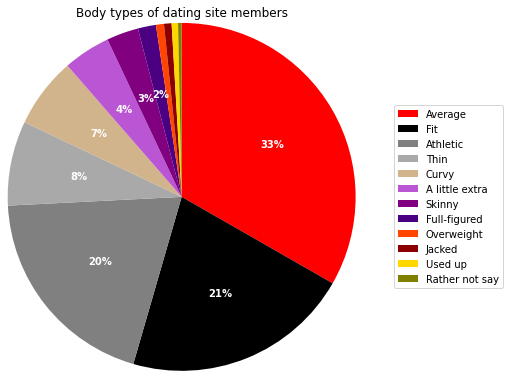

In [426]:
#putting data in a pie chart

#don't want all percentages shown on pie as it's too cluttered - this function will avoid this - will exclude percentages
#below 2%

def my_autopct(pct):
    return ('%.0f%%' % pct) if pct > 1 else ''

body_type = ['Average', 'Fit', 'Athletic', 'Thin', 'Curvy', 'A little extra', 'Skinny', 'Full-figured', 'Overweight', 
            'Jacked', 'Used up', 'Rather not say']

colors = ['red', 'black', 'grey','darkgrey', 'tan', 'mediumorchid', 'purple', 'indigo', 'orangered', 'darkred', \
          'gold', 'olive']

_, _, autotexts = plt.pie(body['body_type_count'], colors = colors, radius = 2.0, autopct = my_autopct, \
                          counterclock = False, startangle = -270)

#bbox_to_anchor moves the legend around depending on the numbers fed in
plt.legend(labels = body_type, bbox_to_anchor = (2, 0.5), loc = 'right')


#setting the colour of percentage labels to white
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

#the y = 1.3 shifts the title up above the chart 
plt.title('Body types of dating site members', y = 1.3)
plt.savefig('body_types')

In [427]:
#grouping by diet
diet = dating_clean.groupby('diet').size().sort_values(ascending = False).to_frame().reset_index().rename(columns = \
                                                                                                    {0: 'diet_count'})
diet.head()

,diet,diet_count
0,no response given,24394
1,mostly anything,16585
2,anything,6183
3,strictly anything,5113
4,mostly vegetarian,3444


In [428]:
#diet dataframe has lots of similar diets - creating an extra column to group some of these using a dictionary method
diet_dictionary = {'no response given': 'No response',
                  'mostly anything': 'Anything',
                  'anything': 'Anything',
                  'strictly anything': 'Anything',
                  'mostly vegetarian': 'Vegetarian',
                  'mostly other': 'Other',
                  'strictly vegetarian': 'Vegetarian',
                  'vegetarian': 'Vegetarian',
                  'strictly other': 'Other',
                   'mostly vegan': 'Vegan',
                   'other': 'Other',
                  'strictly vegan': 'Vegan',
                  'vegan': 'Vegan',
                  'mostly kosher': 'Kosher',
                  'mostly halal': 'Halal',
                  'strictly kosher': 'Kosher',
                  'strictly halal': 'Halal',
                  'kosher': 'Kosher',
                  'halal': 'Halal'}

diet['diet_group'] = diet['diet'].map(diet_dictionary)
diet.head()

,diet,diet_count,diet_group
0,no response given,24394,No response
1,mostly anything,16585,Anything
2,anything,6183,Anything
3,strictly anything,5113,Anything
4,mostly vegetarian,3444,Vegetarian


In [429]:
#grouping by the new diet column
diet_group = diet.groupby('diet_group').diet_count.sum().sort_values(ascending = False).to_frame().reset_index()
diet_group

,diet_group,diet_count
0,Anything,27881
1,No response,24394
2,Vegetarian,4985
3,Other,1789
4,Vegan,702
5,Kosher,115
6,Halal,77


Text(0.5, 1.0, 'Diets of dating site members')

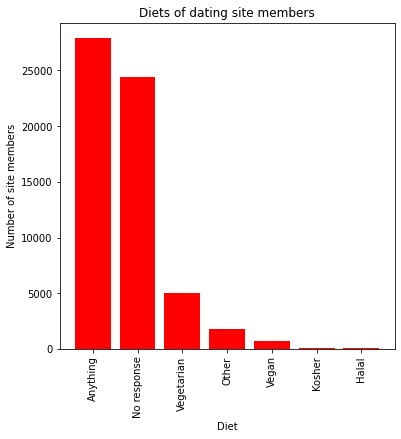

In [430]:
#plotting diet on a bar chart
plt.figure(figsize = (6, 6))
plt.bar(diet_group['diet_group'], diet_group['diet_count'], color = 'red')
plt.xticks(rotation = 90)
plt.xlabel('Diet')
plt.ylabel('Number of site members')
plt.title('Diets of dating site members')

In [431]:
#grouping by drinks column
drinks = dating_clean.groupby('drinks').size().sort_values(ascending = False).to_frame().reset_index().rename(columns = \
                                                                                                    {0: 'count_of_drinks'})
drinks

,drinks,count_of_drinks
0,socially,41778
1,rarely,5957
2,often,5164
3,not at all,3266
4,no response given,2985
5,very often,471
6,desperately,322


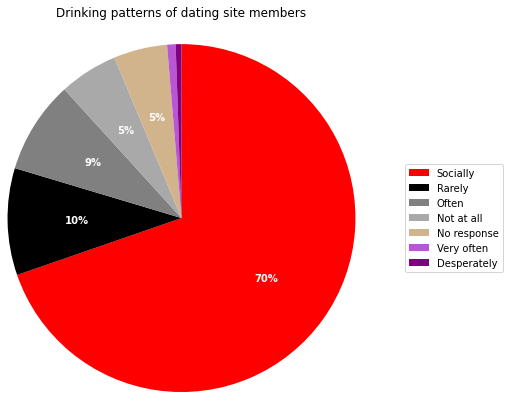

In [432]:
#creating a pie chart - high proportion are social drinkers

def my_autopct(pct):
    return ('%.0f%%' % pct) if pct > 1 else ''

drinks_labels = ['Socially', 'Rarely', 'Often', 'Not at all', 'No response', 'Very often', 'Desperately']

colors = ['red', 'black', 'grey','darkgrey', 'tan', 'mediumorchid', 'purple']

_, _, autotexts = plt.pie(drinks['count_of_drinks'], colors = colors, radius = 2.0, autopct = my_autopct, \
                          counterclock = False, startangle = -270)

#bbox_to_anchor moves the legend around depending on the numbers fed in
plt.legend(labels = drinks_labels, bbox_to_anchor = (2, 0.5), loc = 'right')

#setting the colour of percentage labels to white
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

#the y = 1.3 shifts the title up above the chart 
plt.title('Drinking patterns of dating site members', y = 1.4)
plt.savefig('drinking_patterns')

In [433]:
#grouping drugs data
drugs = dating_clean.groupby('drugs').size().sort_values(ascending = False).to_frame().reset_index().rename(columns = \
                                                                                                    {0: 'count_of_drugs'})
drugs

,drugs,count_of_drugs
0,never,37722
1,no response given,14079
2,sometimes,7732
3,often,410


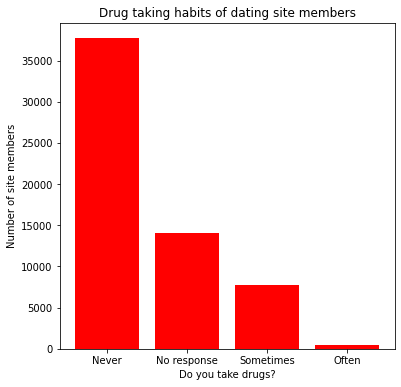

In [434]:
#plotting on bar chart
labels = ['Never', 'No response', 'Sometimes', 'Often']

plt.figure(figsize = (6, 6))
plt.bar(drugs['drugs'], drugs['count_of_drugs'], color = 'red')
plt.xticks(drugs['drugs'], labels)
plt.xlabel('Do you take drugs?')
plt.ylabel('Number of site members')
plt.title('Drug taking habits of dating site members')
plt.savefig('Drugs')

In [435]:
#grouping by education
education = dating_clean.groupby('education').size().sort_values(ascending = False).to_frame().reset_index().rename(columns\
                                                                                                    = {0: 'education_count'})
education.head()

,education,education_count
0,graduated from college/university,23957
1,graduated from masters program,8961
2,no response given,6628
3,working on college/university,5712
4,working on masters program,1683


In [436]:
#education dataframe has lots of similar educations - creating an extra column to group some of these using a dictionary 
#method
education_dictionary = {'graduated from college/university': 'Graduated - higher education',
                       'graduated from masters program': 'Graduated - higher education',
                       'no response given': 'No response',
                       'working on college/university': 'Currently studying - higher education',
                       'working on masters program': 'Currently studying - higher education',
                       'graduated from two-year college': 'Graduated - lower education',
                       'graduated from high school': 'Graduated - lower education',
                       'graduated from ph.d program': 'Graduated - higher education',
                       'graduated from law school': 'Graduated - higher education',
                       'working on two-year college': 'Currently studying - lower education',
                       'dropped out of college/university': 'Dropped out',
                       'working on ph.d program': 'Currently studying - higher education',
                       'college/university': 'Currently studying - higher education',
                       'graduated from space camp': 'Graduated - higher education',
                       'dropped out of space camp': 'Dropped out',
                       'graduated from med school': 'Graduated - higher education',
                       'working on space camp': 'Currently studying - higher education',
                       'working on law school': 'Currently studying - higher education',
                       'two-year college': 'Currently studying - lower education',
                       'working on med school': 'Currently studying - higher education',
                       'dropped out of two-year college': 'Dropped out',
                       'dropped out of masters program': 'Dropped out',
                       'masters program': 'Currently studying - higher education',
                       'dropped out of ph.d program': 'Dropped out',
                       'dropped out of high school': 'Dropped out',
                       'high school': 'Currently studying - lower education',
                       'working on high school': 'Currently studying - lower education',
                       'space camp': 'Currently studying - higher education',
                       'ph.d program': 'Currently studying - higher education',
                       'law school': 'Currently studying - higher education',
                       'dropped out of law school': 'Dropped out',
                       'dropped out of med school': 'Dropped out',
                       'med school': 'Currently studying - higher education'}

education['education_group'] = education['education'].map(education_dictionary)
education.head()

,education,education_count,education_group
0,graduated from college/university,23957,Graduated - higher education
1,graduated from masters program,8961,Graduated - higher education
2,no response given,6628,No response
3,working on college/university,5712,Currently studying - higher education
4,working on masters program,1683,Currently studying - higher education


In [437]:
#grouping by new column in education table
education_grouped = education.groupby('education_group').education_count.sum().sort_values().to_frame().reset_index()
education_grouped

,education_group,education_count
0,Currently studying - lower education,1479
1,Dropped out,2108
2,Graduated - lower education,2959
3,No response,6628
4,Currently studying - higher education,10355
5,Graduated - higher education,36414


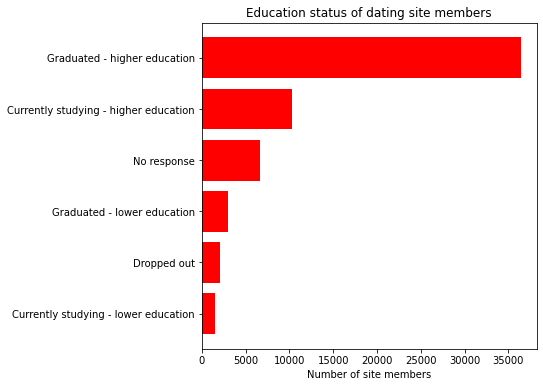

In [438]:
#plotting on a bar chart - many of the sites's members are highly educated
plt.figure(figsize = (6, 6))
plt.barh(education_grouped['education_group'], education_grouped['education_count'], color = 'red')
plt.xlabel('Number of site members')
plt.ylabel('')
plt.title('Education status of dating site members')
plt.savefig('Education')

In [439]:
#is there a link between those who dropped out of education and their drink/drugs taking? Filtering the main dataframe to
#find out
dropped_out = dating_clean[dating_clean['education'].str.contains('dropped')]
dropped_out.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
48,31,thin,strictly anything,socially,sometimes,dropped out of space camp,no response given,67,1000000,artistic / musical / writer,...,"san francisco, california",doesn't have kids,bisexual,no response given,no response given,f,no response given,no,"english (fluently), belarusan, gujarati, lisp,...",single
96,34,skinny,mostly other,very often,no response given,dropped out of space camp,white,75,-1,hospitality / travel,...,"san francisco, california",no response given,straight,likes dogs and has cats,other and very serious about it,m,aries,no,"english (poorly), german (poorly), spanish (po...",single
117,55,athletic,no response given,not at all,never,dropped out of college/university,white,67,-1,construction / craftsmanship,...,"alameda, california",has kids,straight,likes dogs and likes cats,other but not too serious about it,m,leo,no,"english (fluently), spanish (fluently), japane...",single
128,26,average,no response given,often,never,dropped out of space camp,white,71,-1,computer / hardware / software,...,"san francisco, california",doesn't want kids,straight,likes dogs and likes cats,atheism and laughing about it,m,libra,trying to quit,english,single
130,30,average,no response given,socially,sometimes,dropped out of college/university,white,69,-1,no response given,...,"san francisco, california",no response given,straight,likes cats,agnosticism,m,gemini but it doesn't matter,yes,english,available


In [440]:
#grouping by the dropped out column
dropped = dropped_out.groupby('education').size().sort_values(ascending = False).to_frame().reset_index().rename(columns \
                                                                                                    = {0: 'dropped_count'})
dropped

,education,dropped_count
0,dropped out of college/university,995
1,dropped out of space camp,523
2,dropped out of two-year college,191
3,dropped out of masters program,140
4,dropped out of ph.d program,127
5,dropped out of high school,102
6,dropped out of law school,18
7,dropped out of med school,12


In [441]:
#splitting these between dropping out of higher and lower eduction by applying a function

def set_value(row_number, assigned_value):
    return(assigned_value[row_number])

dropped_out_dict = {'dropped out of college/university': 'dropped out - higher education',
                   'dropped out of space camp': 'dropped out - higher education',
                   'dropped out of two-year college': 'dropped out - lower education',
                   'dropped out of masters program': 'dropped out - higher education',
                   'dropped out of ph.d program': 'dropped out - higher education',
                   'dropped out of high school': 'dropped out - lower education',
                   'dropped out of law school': 'dropped out - higher education',
                   'dropped out of med school': 'dropped out - higher education'}

#there is a comma after dropped_out_dict below - without this there was an error saying the function expected 2 arguments
#but 9 were given
dropped_out['dropped_group'] = dropped_out['education'].apply(set_value, args = (dropped_out_dict, ))
dropped_out.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,dropped_group
48,31,thin,strictly anything,socially,sometimes,dropped out of space camp,no response given,67,1000000,artistic / musical / writer,...,doesn't have kids,bisexual,no response given,no response given,f,no response given,no,"english (fluently), belarusan, gujarati, lisp,...",single,dropped out - higher education
96,34,skinny,mostly other,very often,no response given,dropped out of space camp,white,75,-1,hospitality / travel,...,no response given,straight,likes dogs and has cats,other and very serious about it,m,aries,no,"english (poorly), german (poorly), spanish (po...",single,dropped out - higher education
117,55,athletic,no response given,not at all,never,dropped out of college/university,white,67,-1,construction / craftsmanship,...,has kids,straight,likes dogs and likes cats,other but not too serious about it,m,leo,no,"english (fluently), spanish (fluently), japane...",single,dropped out - higher education
128,26,average,no response given,often,never,dropped out of space camp,white,71,-1,computer / hardware / software,...,doesn't want kids,straight,likes dogs and likes cats,atheism and laughing about it,m,libra,trying to quit,english,single,dropped out - higher education
130,30,average,no response given,socially,sometimes,dropped out of college/university,white,69,-1,no response given,...,no response given,straight,likes cats,agnosticism,m,gemini but it doesn't matter,yes,english,available,dropped out - higher education


In [442]:
#dropping unnecessary columns
dropped_out = dropped_out.drop(['age', 'body_type', 'diet', 'ethnicity', 'height', 'income', 'job', 'last_online', 'location',\
                              'offspring', 'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'], \
                               axis = 1).reset_index(drop = True)
dropped_out.head()

,drinks,drugs,education,dropped_group
0,socially,sometimes,dropped out of space camp,dropped out - higher education
1,very often,no response given,dropped out of space camp,dropped out - higher education
2,not at all,never,dropped out of college/university,dropped out - higher education
3,often,never,dropped out of space camp,dropped out - higher education
4,socially,sometimes,dropped out of college/university,dropped out - higher education


In [443]:
#grouping by education and drinking - higher education people who dropped out drink more
dropped_drink = dropped_out.groupby(['dropped_group', 'drinks']).dropped_group.count()
dropped_drink

dropped_group                   drinks           
dropped out - higher education  desperately            41
                                no response given      50
                                not at all            147
                                often                 264
                                rarely                246
                                socially             1027
                                very often             40
dropped out - lower education   desperately             7
                                no response given       5
                                not at all             35
                                often                  44
                                rarely                 41
                                socially              143
                                very often             18
Name: dropped_group, dtype: int64

In [444]:
#grouping by education and drugs - higher education people who dropped out do more drugs
dropped_drugs = dropped_out.groupby(['dropped_group', 'drugs']).dropped_group.count()
dropped_drugs

dropped_group                   drugs            
dropped out - higher education  never                817
                                no response given    454
                                often                 43
                                sometimes            501
dropped out - lower education   never                139
                                no response given     48
                                often                 19
                                sometimes             87
Name: dropped_group, dtype: int64

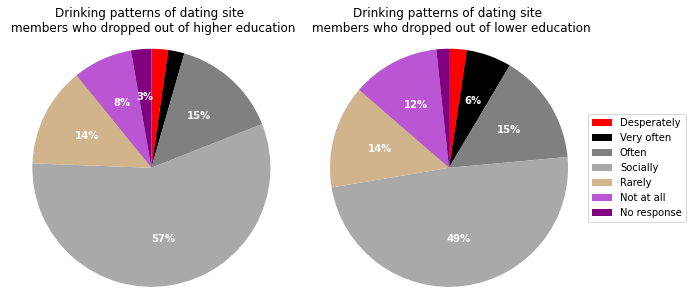

In [445]:
#creating pie charts to show the comparison
drink_labels = ['Desperately', 'Very often', 'Often', 'Socially', 'Rarely', 'Not at all', 'No response']

drinks_higher = [41, 40, 264, 1027, 246, 147, 50]
drinks_lower = [7, 18, 44, 143, 41, 35, 5] 
colors = ['red', 'black', 'grey','darkgrey', 'tan', 'mediumorchid', 'purple']

def drinks_autopct(pct):
    return ('%.0f%%' % pct) if pct > 2.5 else ''

ax = plt.subplot(1, 2, 1)
_, _, autotexts = (plt.pie(drinks_higher, colors = colors, radius = 8.0, autopct = drinks_autopct, counterclock = False, \
                           startangle = -270))
#setting the colour of percentage labels to white
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')
    
plt.title('Drinking patterns of dating site \n members who dropped out of higher education', y = 4.0)

ax = plt.subplot(1, 2, 2)
_, _, autotexts = plt.pie(drinks_lower, colors = colors, radius = 8.0, autopct = drinks_autopct, counterclock = False, \
                          startangle = -270)

#adjusting space between pie charts
plt.subplots_adjust(wspace = 7.0)

#bbox_to_anchor moves the legend around depending on the numbers fed in
plt.legend(labels = drink_labels, bbox_to_anchor = (7, 0.5), loc = 'right')

#setting the colour of percentage labels to white
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

plt.title('Drinking patterns of dating site \n members who dropped out of lower education', y = 4.0)
plt.savefig('drinking_patterns_by education')

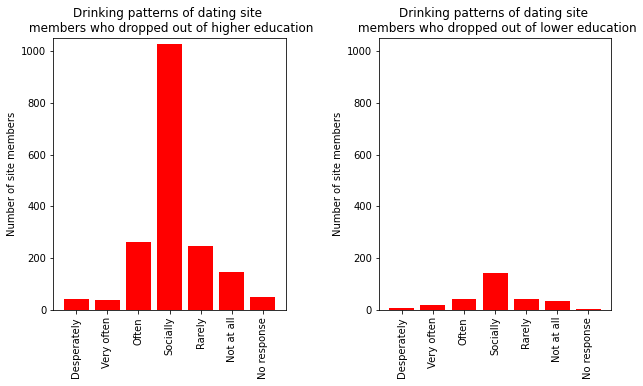

In [446]:
#pie chart hides the true numbers - trying a bar chart
drink_labels = ['Desperately', 'Very often', 'Often', 'Socially', 'Rarely', 'Not at all', 'No response']

drinks_higher = [41, 40, 264, 1027, 246, 147, 50]
drinks_lower = [7, 18, 44, 143, 41, 35, 5]

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(1, 2, 1)               
plt.bar(drink_labels, drinks_higher, color = 'red')
plt.xticks(drink_labels, rotation = 90)
plt.ylim(0, 1050)
plt.xlabel('')
plt.ylabel('Number of site members')
plt.title('Drinking patterns of dating site \n members who dropped out of higher education')

ax = fig.add_subplot(1, 2, 2)               
plt.bar(drink_labels, drinks_lower, color = 'red')
plt.xticks(drink_labels, rotation = 90)
plt.ylim(0, 1050)
plt.xlabel('')
plt.ylabel('Number of site members')
plt.title('Drinking patterns of dating site \n members who dropped out of lower education')

plt.subplots_adjust(wspace = 0.4)
plt.savefig('drinking_patterns_by_education_bar_chart')

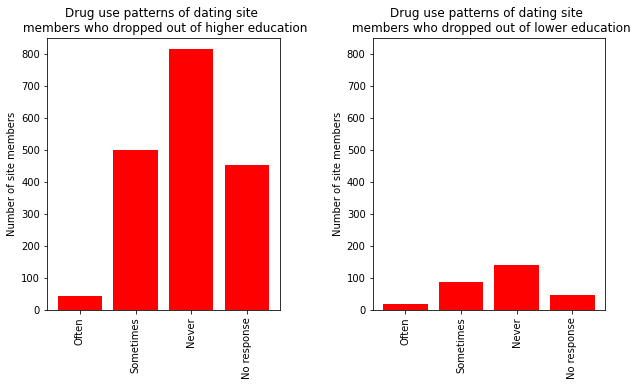

In [447]:
#creating bar charts for drug use
drug_labels = ['Often', 'Sometimes', 'Never', 'No response']

drugs_higher = [43, 501, 817, 454]
drugs_lower = [19, 87, 139, 48]

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(1, 2, 1)               
plt.bar(drug_labels, drugs_higher, color = 'red')
plt.xticks(drug_labels, rotation = 90)
plt.xlabel('')
plt.ylim(0, 850)
plt.ylabel('Number of site members')
plt.title('Drug use patterns of dating site \n members who dropped out of higher education')

ax = fig.add_subplot(1, 2, 2)               
plt.bar(drug_labels, drugs_lower, color = 'red')
plt.xticks(drug_labels, rotation = 90)
plt.xlabel('')
plt.ylim(0, 850)
plt.ylabel('Number of site members')
plt.title('Drug use patterns of dating site \n members who dropped out of lower education')

plt.subplots_adjust(wspace = 0.4)
plt.savefig('drug_use_patterns_by_education')

In [448]:
#next up: analysing ethnicity data